In [31]:
# Import necessary liberary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [32]:
# Read the CSV file
df = pd.read_csv("rfm_data.csv", encoding='latin-1')

1. **Data Cleaning**

In [33]:
# Print the first 5 rows of the DataFrame
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [34]:
# Summary statistics
print(df.shape)

(541909, 8)


In [35]:
# Print descriptive stats
print(df[['Quantity','UnitPrice']].describe())

            Quantity      UnitPrice
count  541909.000000  541909.000000
mean        9.552250       4.611114
std       218.081158      96.759853
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000


In [36]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [37]:
# Display summary statistics
print(df.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [38]:
# Check for missing values
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [39]:
# Removing Negative values from Quantity
df = df[df['Quantity'] >= 0]

In [40]:
# Drop rows with NA values in specific columns 
df = df.dropna(subset=['CustomerID'])
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [41]:
# Summary statistics
print(df.shape)

(397924, 8)


**2. Feature Engineering and Exploratory Data Analysis**

In [42]:
# Explore unique values in categorical columns
categorical_columns = ['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country']
for column in categorical_columns:
    unique_values = df[column].nunique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in InvoiceNo: 18536
Unique values in StockCode: 3665
Unique values in Description: 3877
Unique values in CustomerID: 4339
Unique values in Country: 37


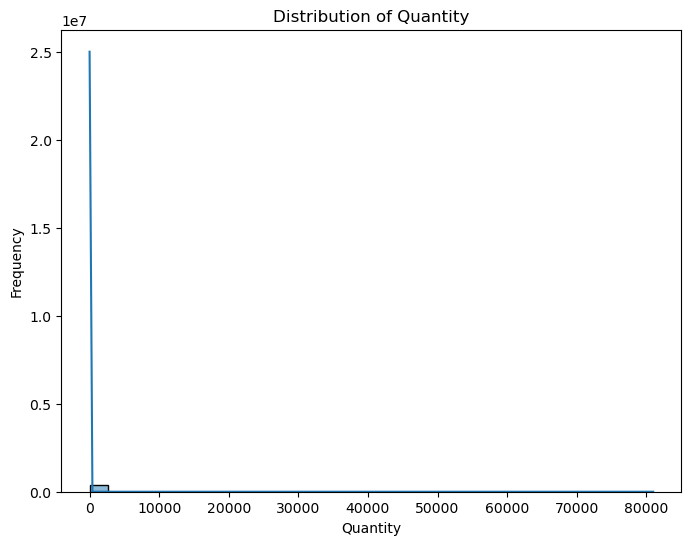

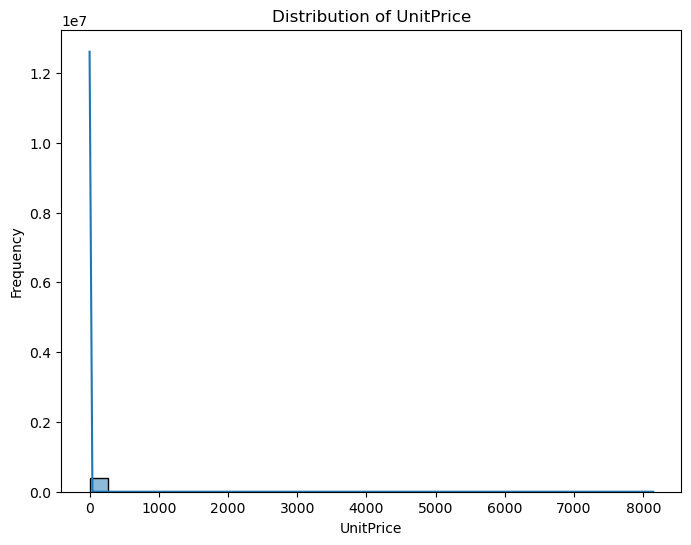

In [63]:
# Explore numerical columns
numerical_columns = ['Quantity', 'UnitPrice']
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, bins=30, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [64]:
# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create 'TotalAmount' column
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Print specific columns
print(df[['InvoiceDate', 'Quantity', 'UnitPrice', 'TotalAmount']])

               InvoiceDate  Quantity  UnitPrice  TotalAmount
0      2010-12-01 08:26:00         6       2.55        15.30
1      2010-12-01 08:26:00         6       3.39        20.34
2      2010-12-01 08:26:00         8       2.75        22.00
3      2010-12-01 08:26:00         6       3.39        20.34
4      2010-12-01 08:26:00         6       3.39        20.34
...                    ...       ...        ...          ...
541904 2011-12-09 12:50:00        12       0.85        10.20
541905 2011-12-09 12:50:00         6       2.10        12.60
541906 2011-12-09 12:50:00         4       4.15        16.60
541907 2011-12-09 12:50:00         4       4.15        16.60
541908 2011-12-09 12:50:00         3       4.95        14.85

[397924 rows x 4 columns]


In [66]:
# Explore time-related patterns
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

print(df[['Year', 'Month', 'Day','Hour']])

        Year  Month  Day  Hour
0       2010     12    1     8
1       2010     12    1     8
2       2010     12    1     8
3       2010     12    1     8
4       2010     12    1     8
...      ...    ...  ...   ...
541904  2011     12    9    12
541905  2011     12    9    12
541906  2011     12    9    12
541907  2011     12    9    12
541908  2011     12    9    12

[397924 rows x 4 columns]


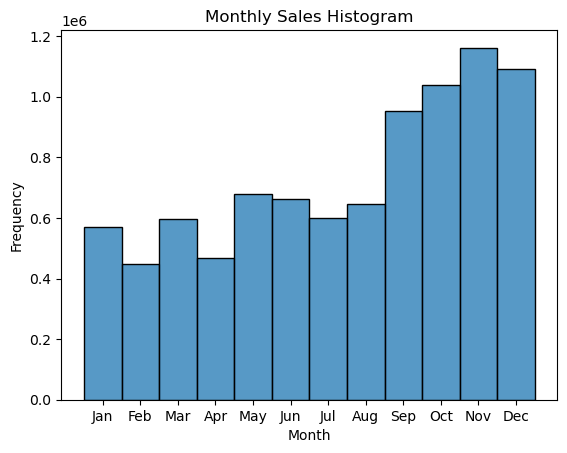

In [74]:
# Map months to names
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',
             5:'May', 6:'Jun', 7:'Jul', 8:'Aug',  
             9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

monthly_sales['MonthName'] = monthly_sales['Month'].map(month_map)

# Plot histogram 
sns.histplot(data=monthly_sales, x='MonthName', weights='TotalAmount', stat='count')

# Add labels
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.title("Monthly Sales Histogram")

# Show plot
plt.show()

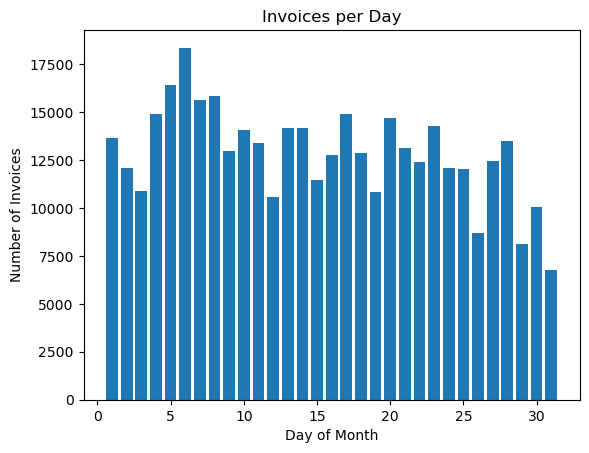

In [75]:
# Extract day from InvoiceDate
df['InvoiceDay'] = df['InvoiceDate'].dt.day

# Get invoice count per day
invoices_per_day = df.groupby('InvoiceDay').InvoiceNo.count().reset_index()

# Plot bar chart 
plt.bar(invoices_per_day['InvoiceDay'], invoices_per_day['InvoiceNo'])

plt.xlabel('Day of Month')
plt.ylabel('Number of Invoices')
plt.title('Invoices per Day')

plt.show()

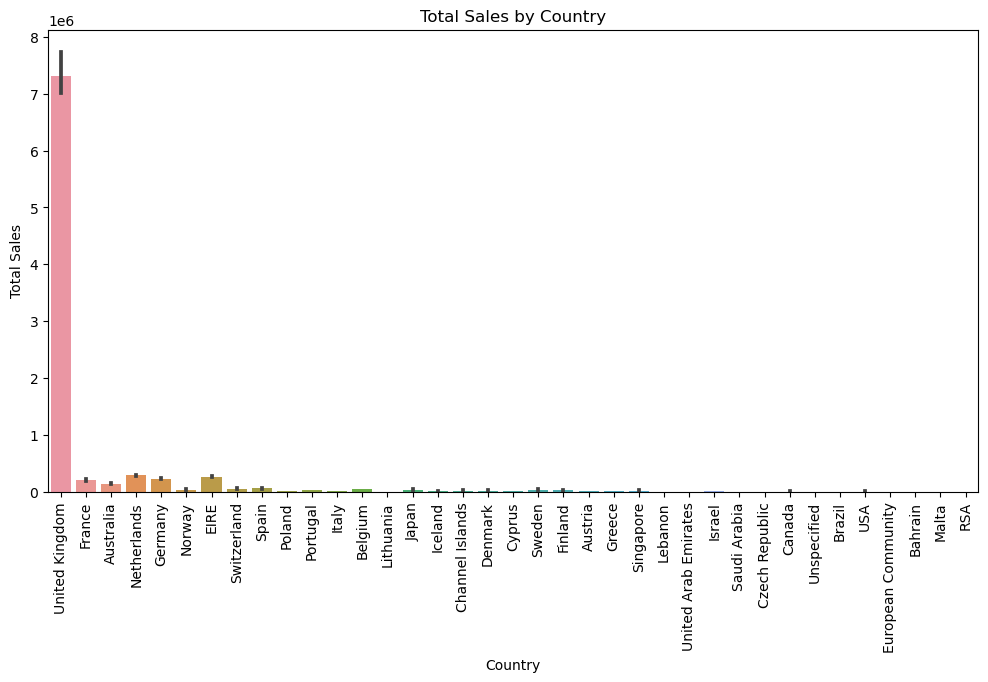

In [47]:
# Explore customer segments (e.g., by country)
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Country', y='TotalAmount', estimator=sum)
plt.title("Total Sales by Country")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

            Recency  Frequency  Monetary
CustomerID                              
12346.0         325          1  77183.60
12347.0           1          7   4310.00
12348.0          74          4   1797.24
12349.0          18          1   1757.55
12350.0         309          1    334.40
...             ...        ...       ...
18280.0         277          1    180.60
18281.0         180          1     80.82
18282.0           7          2    178.05
18283.0           3         16   2094.88
18287.0          42          3   1837.28

[4339 rows x 3 columns]


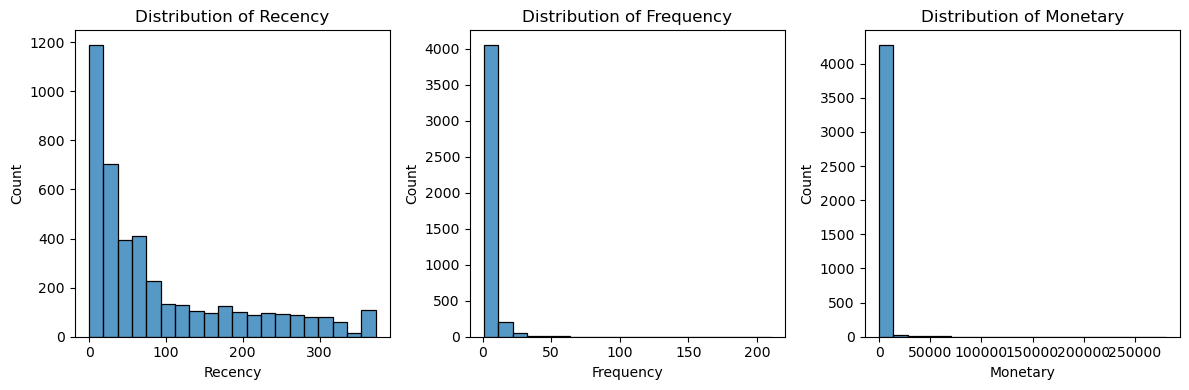

In [58]:
# Calculate RFM metrics
current_date = max(df['InvoiceDate'])
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalAmount': 'sum'
})
rfm_df.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalAmount': 'Monetary'}, inplace=True)
print(rfm_df)

# Distribution of RFM metrics
plt.figure(figsize=(12, 4))
for i, column in enumerate(['Recency', 'Frequency', 'Monetary'], start=1):
    plt.subplot(1, 3, i)
    sns.histplot(rfm_df[column], bins=20)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

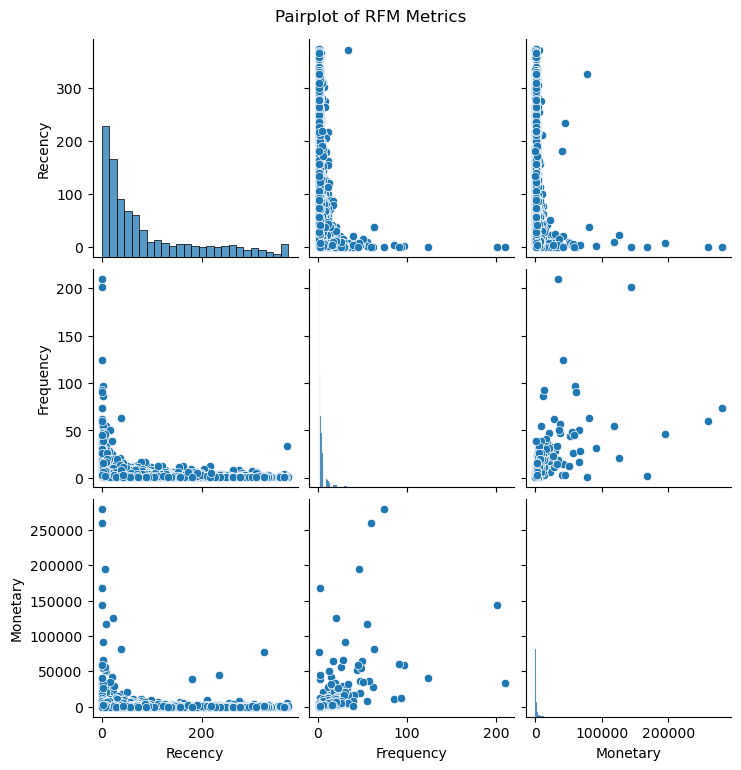

In [53]:
# Pairplot of RFM metrics
sns.pairplot(rfm_df)
plt.suptitle("Pairplot of RFM Metrics", y=1.02)
plt.show()

# Log transformation of RFM metrics for normalization
rfm_log = np.log1p(rfm_df[['Recency', 'Frequency', 'Monetary']])

In [49]:
# Standardize the RFM metrics
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

# K-means clustering for segmentation
from sklearn.cluster import KMeans
# Let's assume we want to create 4 segments
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Reset index before aggregation
rfm_df.reset_index(inplace=True)

# Analyze cluster characteristics
cluster_summary = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
})
print(cluster_summary)

            Recency  Frequency     Monetary  CustomerID
Cluster                                                
0         10.349854  13.978134  8293.131356         686
1        179.355407   1.320170   350.783251        1646
2         67.498749   4.226022  1838.547417        1199
3         17.138614   2.112624   545.188379         808


/Users/omosholaowolabi/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


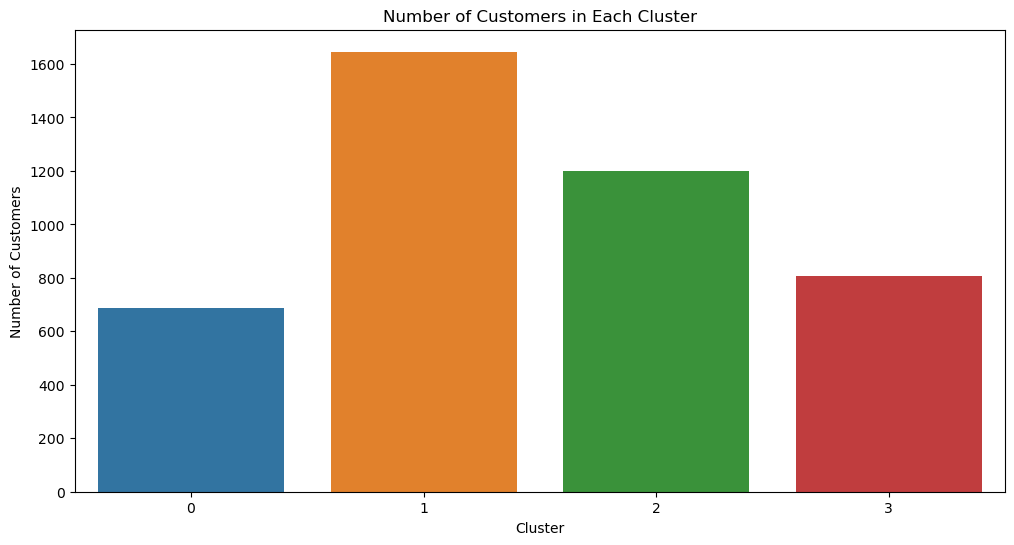

In [50]:
# Visualize cluster characteristics
plt.figure(figsize=(12, 6))
sns.barplot(data=cluster_summary, x=cluster_summary.index, y='CustomerID')
plt.title("Number of Customers in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()